In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Define the CNN encoder for feature extraction
encoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten()
])

# Define classifier for digit classification
classifier_digits = Sequential([
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Define classifier for odd and even classification
classifier_odd_even = Sequential([
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Combine encoder and classifiers
model_digits = Sequential([encoder, classifier_digits])
model_odd_even = Sequential([encoder, classifier_odd_even])

# Compile models
model_digits.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_odd_even.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train models
model_digits.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))
model_odd_even.fit(x_train, y_train % 2, epochs=3, validation_data=(x_test, y_test % 2))

# Evaluate models
y_pred_digits = model_digits.predict(x_test)
y_pred_digits = tf.argmax(y_pred_digits, axis=1)
y_pred_odd_even = (model_odd_even.predict(x_test) > 0.5).astype('int32')








Epoch 1/3


1875/1875 [==============================] - 22s 11ms/step - loss: 0.1314 - accuracy: 0.9594 - val_loss: 0.0492 - val_accuracy: 0.9842
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0406 - val_accuracy: 0.9879
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 1/3
1875/1875 [==============================] - 21s 10ms/step - loss: 0.0379 - accuracy: 0.9865 - val_loss: 0.0176 - val_accuracy: 0.9938
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0149 - val_accuracy: 0.9955
Epoch 3/3
313/313 [==============================] - 2s 5ms/step


# Comparision of different Metrics

From the various metrices we can conclude that the accuracy is slightly higher in case of Odd-Even classification then in comparision to that of Digit classification. 

In [2]:
# Print metrics for digit classification
print("Digit Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_digits)}")
print(f"Precision: {precision_score(y_test, y_pred_digits, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_digits, average='macro')}")
print(f"F1-score: {f1_score(y_test, y_pred_digits, average='macro')}")

# Print metrics for odd-even classification
print("\nOdd-Even Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test % 2, y_pred_odd_even)}")
print(f"Precision: {precision_score(y_test % 2, y_pred_odd_even)}")
print(f"Recall: {recall_score(y_test % 2, y_pred_odd_even)}")
print(f"F1-score: {f1_score(y_test % 2, y_pred_odd_even)}")


Digit Classification Metrics:
Accuracy: 0.9879
Precision: 0.9879719617217934
Recall: 0.9878642920460401
F1-score: 0.9878670970401038

Odd-Even Classification Metrics:
Accuracy: 0.9941
Precision: 0.9946735056224107
Recall: 0.9936933385888845
F1-score: 0.9941831805185843


1/1 [==============================] - 0s 49ms/step


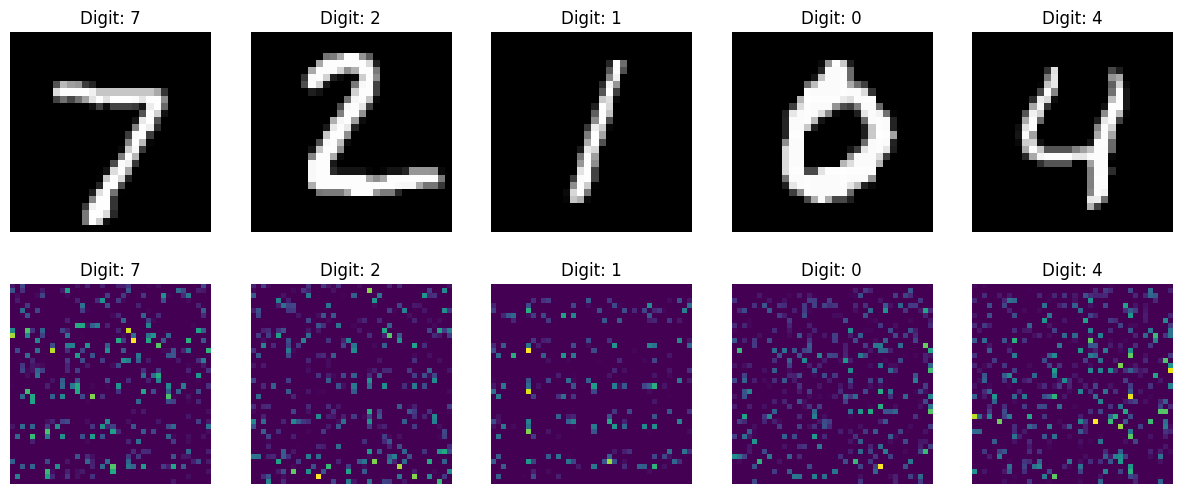

In [3]:
# Visualize the feature maps
sample_images = x_test[:5]  # Get the first 5 test images
feature_maps_digit = encoder.predict(sample_images)
feature_maps_odd_even = encoder.predict(sample_images)

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f'Digit: {y_test[i]}')
    plt.axis('off')

for i in range(5):
    plt.subplot(2, 5, i+6)
    feature_map_reshaped = feature_maps_digit[i].reshape(40, 40)  # Reshape to correct dimensions
    plt.imshow(feature_map_reshaped, cmap='viridis')
    plt.title(f'Digit: {y_test[i]}')
    plt.axis('off')

plt.show()
